## lr_find for detectron

    0. pip install torch-lr-finder
    1. Create a config file 
    2. Create a trainer object from this config file
        - Trying to put this step into the method causes errors with the rcnn component registry (specifically the rcnn components I make in train.py), maybe this would be fixed by moving those to a separate file?
    3. Instantiate a COCOLRFinder and run range_test()

In [2]:
from hackathon.train import get_training_config
from hackathon.lr_find import COCOLRFinder

In [3]:
model = "frcnn-r101"
data_dir = "../data/hackathon"
configs_dir = "../lib/detectron2/configs"
device = "cuda"
num_gpus = 1

In [4]:
cfg = get_training_config(model=model, 
                          data_dir=data_dir, 
                          configs_dir=configs_dir, 
                          device=device, 
                          num_gpus=num_gpus)

num_imgs 10322
[11/20 22:47:59 detectron2]: Rank of current process: 0. World size: 1
[11/20 22:48:00 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.9 (default, Aug 31 2020, 12:42:55) [GCC 7.3.0]
numpy                   1.19.1
detectron2              0.2.1 @/home/ubuntu/anaconda3/envs/aifish/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.1
detectron2 arch flags   sm_35, sm_37, sm_50, sm_52, sm_60, sm_61, sm_70, sm_75
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.6.0+cu101 @/home/ubuntu/anaconda3/envs/aifish/lib/python3.7/site-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla V100-SXM2-16GB
CUDA_HOME               /usr/local/cuda
Pillow                  7.2.0
torchvision             0.7.0+cu101 @/home/ubuntu/anaco

In [5]:
lr_finder = COCOLRFinder(cfg)

[11/20 22:48:09 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/home/ubuntu/anaconda3/envs/aifish/lib/python3.7/site-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.72E-04


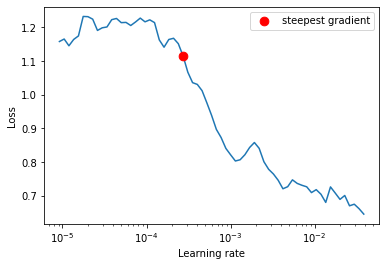

In [6]:
lr_finder.range_test()